## Plot sankey diagram showing how the scale of burden varies over time

In [23]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
from scripts.plots_stats.get_df_ssp import get_df_ssp
from scripts.plots_stats.plot_funcs import plot_burden_bar, plot_burden_sankey

df = get_df_ssp()

(30544, 23) (30544, 23) (30544, 23) (30498, 23) (30498, 23) (30498, 23)
(30498, 41) (30544, 41)
Total number of cities 30498


### Bar plot of Burden

(30332, 179)
(30317, 179)
(27607, 179)
(27792, 179)


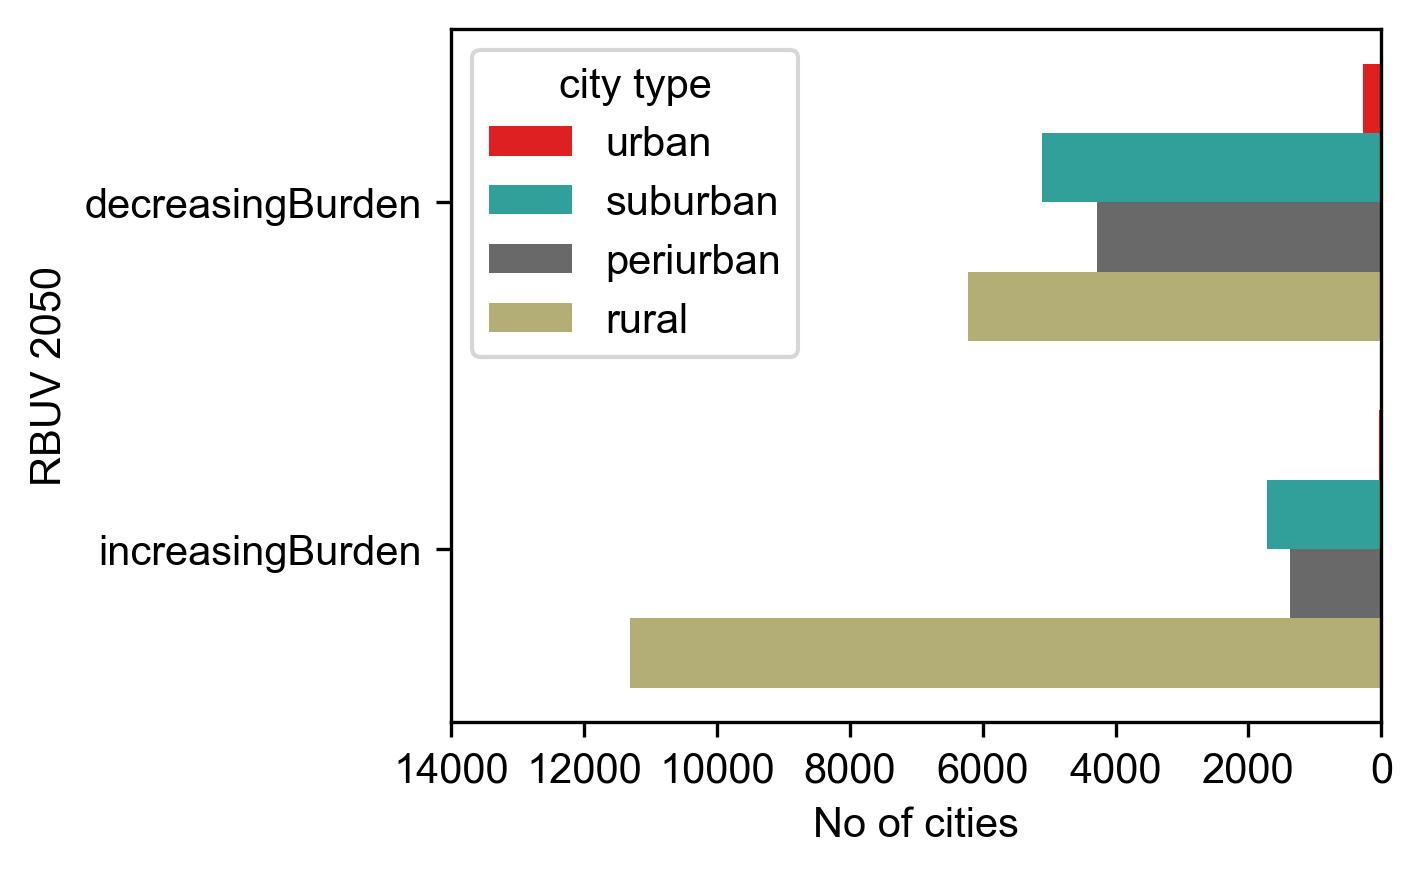

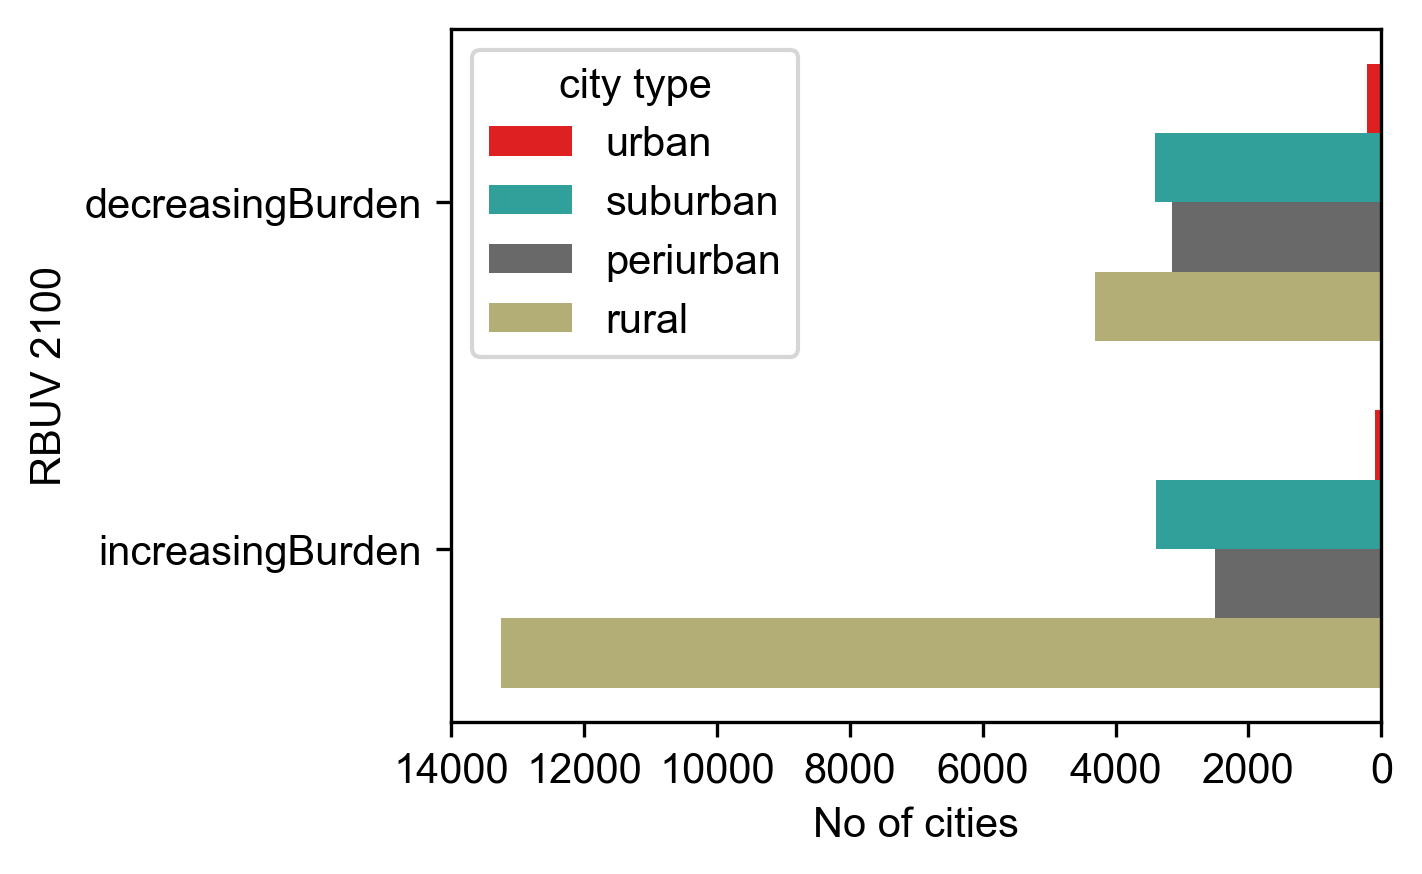

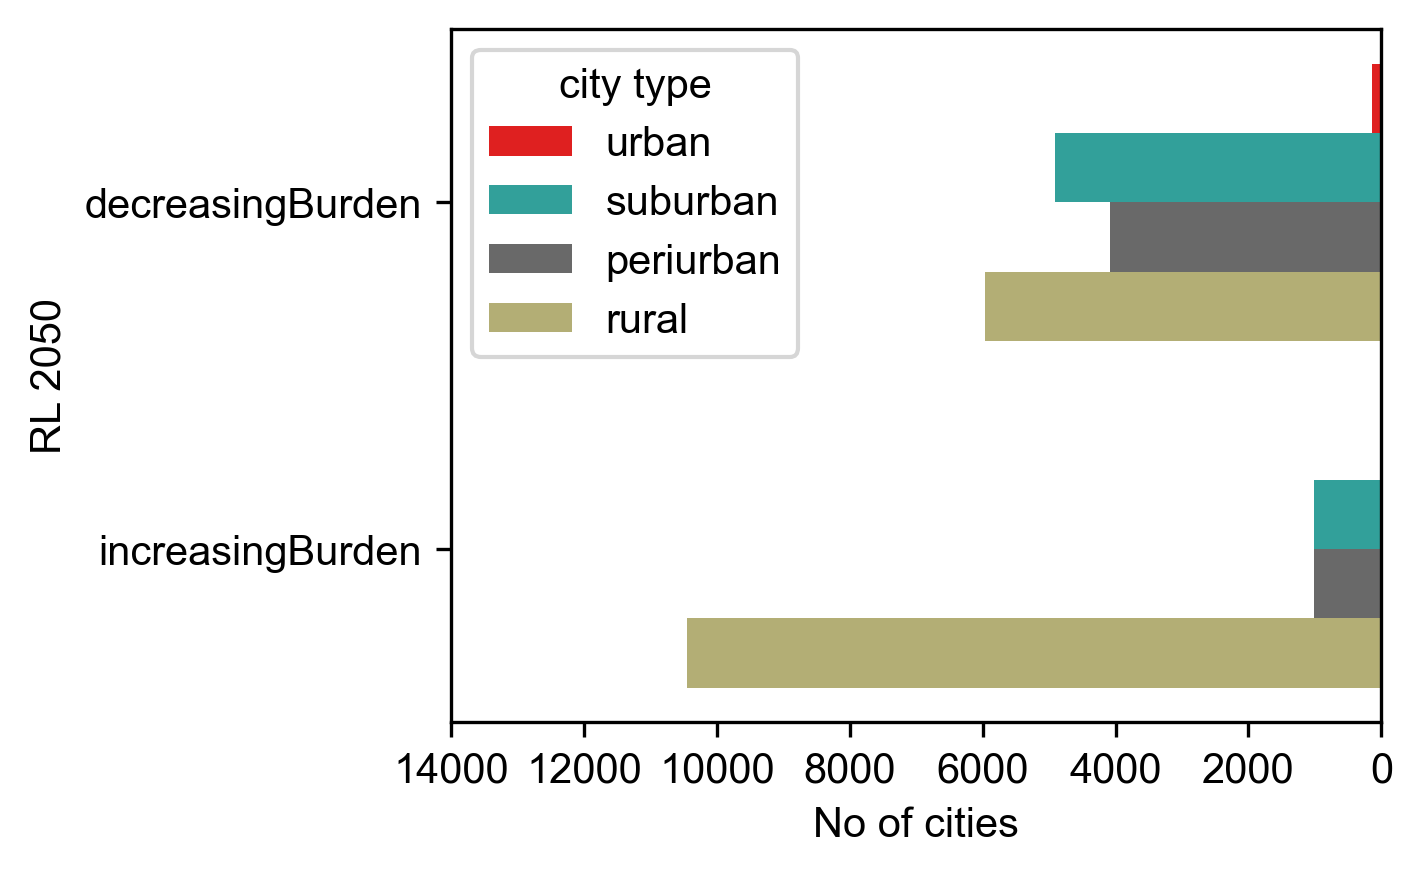

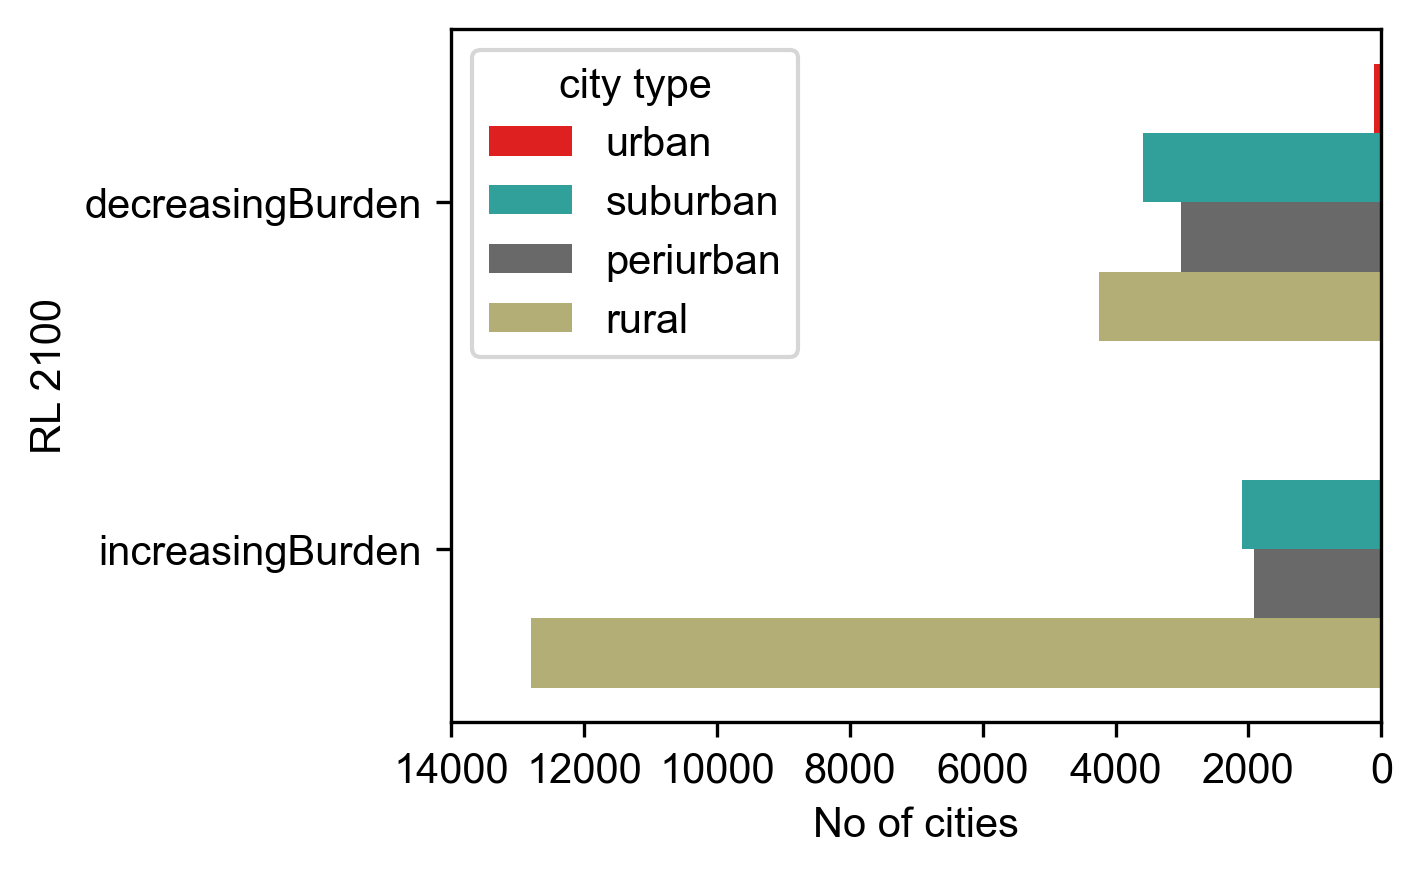

In [25]:
plot_burden_bar(df, 'RBUV_Burden_2050')
plot_burden_bar(df, 'RBUV_Burden_2100')
plot_burden_bar(df, 'RL_Burden_2050')
plot_burden_bar(df, 'RL_Burden_2100')

### Sankey plot of Burden Extent

In [26]:
plot_burden_sankey(df, 'RBUV_Burden_2050', 'RBUV_perCap_2050')
plot_burden_sankey(df, 'RBUV_Burden_2100', 'RBUV_perCap_2100')
plot_burden_sankey(df, 'RL_Burden_2050', 'RL_perCap_2050')
plot_burden_sankey(df, 'RL_Burden_2100', 'RL_perCap_2100')

In [ ]:
trend_col = 'RBUV_Burden_2050'
infra_col = 'RBUV_perCap_2050'

df_parcats = df[df[trend_col] != 'noChange'].reset_index(drop=True)

# Create a parallel categories plot
# using plotly.graph_objects

infra_dim = go.parcats.Dimension(
    values=df_parcats[infra_col], #categoryorder="category ascending",
    categoryarray= df_parcats[infra_col].unique().sort_values(), label= ''
)

future_trend_dim = go.parcats.Dimension(
    values=df_parcats[trend_col], label=" ", # Burden " + trend_col1[-4:],
    categoryarray = ['decreasingBurden','increasingBurden'],
)

city_dim = go.parcats.Dimension(
    values=df_parcats['city type'], label=" ", # Burden " + trend_col1[-4:],
    categoryarray = ['urban', 'suburban', 'periurban', 'rural'],
)

df_parcats['color_col'] = df_parcats['city type']
df_parcats['color_col'] = df_parcats['color_col'].map({'urban': 1, 'suburban': 2,'periurban':3, 'rural':4,})

# Build colorscale
color = [x for x in df_parcats['color_col']]
colorscale =['red', 'lightseagreen', 'dimgrey', 'darkkhaki'] #

# create figure object
fig = go.Figure(
    data=[
        go.Parcats(
            dimensions=[
                future_trend_dim,  
                city_dim ,           
                infra_dim,              
                ],
            line={"color": color, "colorscale": colorscale, 'shape': 'hspline'},
            hoveron="color",
            hoverinfo="count + probability",
            bundlecolors=True,
            labelfont={"size": 18,"family": "arial"},
            tickfont={"size": 16,"family": "arial"},
            arrangement="freeform",
            
        )
    ]
)

fig.update_layout(
    height=400,
    width=800,
    font=dict(size=20, ),
    margin=dict(l=100, r=50, t=20, b=20))
# fig.update_traces(textposition='inside')
fig